# **Neural Networks Assignment 1**

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Collect the data**

In [0]:
df = pd.read_csv("/content/drive/My Drive/Deep Learning - Week 1/Assignment 1/Assignment 1/housing (1).csv")

In [100]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **2. Clean the data**
      # 2.a Get the summary statistics
      # 2.b Check for the missing values
      # 2.c Deal with missing vlaues
      # 2.d Check for outliers
      # 2.e Deal with outliers
      # 2.f Check for duplicate rows 


# 2.a Get the summary statistics

**Functions to use**
1. describe()
2. info()
3. shape
4. dtypes
5. columns
6. Numerical vs Categorical data





In [101]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [103]:
df.shape

(20640, 10)

In [104]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [105]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [106]:
numerical_features=df.dtypes[df.dtypes!='object'].index
print(numerical_features)

categorical_features=df.dtypes[df.dtypes=='object'].index
print(categorical_features)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['ocean_proximity'], dtype='object')


There is only 1 categorical *variable* and there are 9 numerical variables

# 2.b Check for the missing values


In [107]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [108]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 null values in the column total_bedrooms

# 2.c Deal with missing values

We observed that there are 207 missing values in the columns 'total_bedrooms'. I would like to impute these missing values with the help of KNN algorithm. 

In [109]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [0]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['total_bedrooms'] = imputer.fit_transform(df[['total_bedrooms']])

In [111]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [112]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

  # 2.d Check for outliers and 2.e Deal with outliers

179700.0

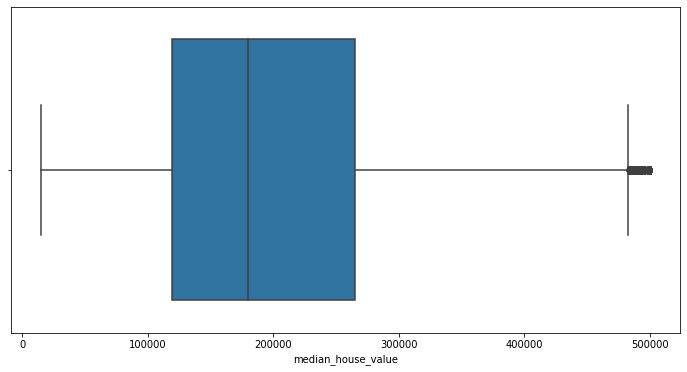

In [113]:
sns.boxplot(df['median_house_value'])
np.quantile(df['median_house_value'],0.5)

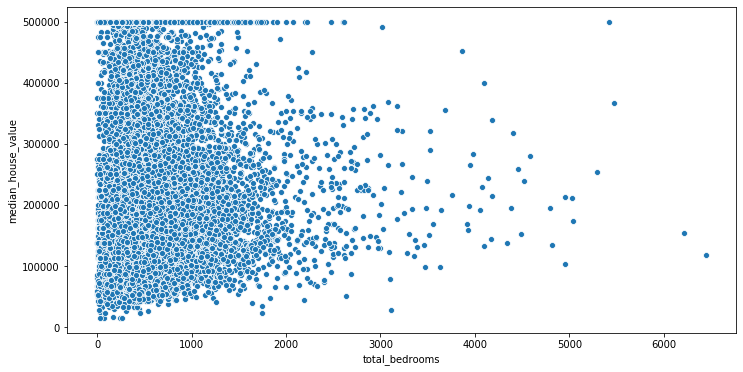

In [114]:
sns.scatterplot(df['total_bedrooms'],df['median_house_value'])

In [115]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           346.25000
population               938.00000
households               325.00000
median_income              2.17985
median_house_value    145125.00000
dtype: float64


In [116]:
df_final = df[~((df < (Q1 - 3 * IQR)) |(df > (Q3 + 3 * IQR))).any(axis=1)]
print(df_final.shape)
print(df.shape)

(df.shape[0] - df_final.shape[0])/df.shape[0]

(19807, 10)
(20640, 10)


0.040358527131782944

In [117]:
df_final.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,19807.000000,19807.000000,19807.000000,19807.000000,19807.000000,19807.000000,19807.000000,19807.000000,19807.000000
mean,-119.588815,35.651520,29.078811,2362.695613,486.839463,1292.810421,453.864240,3.785811,204300.110971
std,2.003751,2.143398,12.413461,1378.164542,278.654896,744.765905,258.106009,1.722166,113503.856986
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.810000,33.930000,19.000000,1428.000000,294.000000,777.000000,277.000000,2.547300,118250.000000
50%,-118.520000,34.270000,29.000000,2076.000000,428.000000,1145.000000,401.000000,3.508300,178100.000000
75%,-118.020000,37.720000,37.000000,3007.000000,617.000000,1656.500000,579.000000,4.687500,261900.000000
max,-114.310000,41.950000,52.000000,8244.000000,1678.000000,4531.000000,1574.000000,11.246300,500001.000000


# 2.f Check for duplicate rows 


In [118]:
df_final.duplicated().sum()

0

There are no duplicate rows

# **3. Explore the data with the help of visualization**

# Univariate Analysis

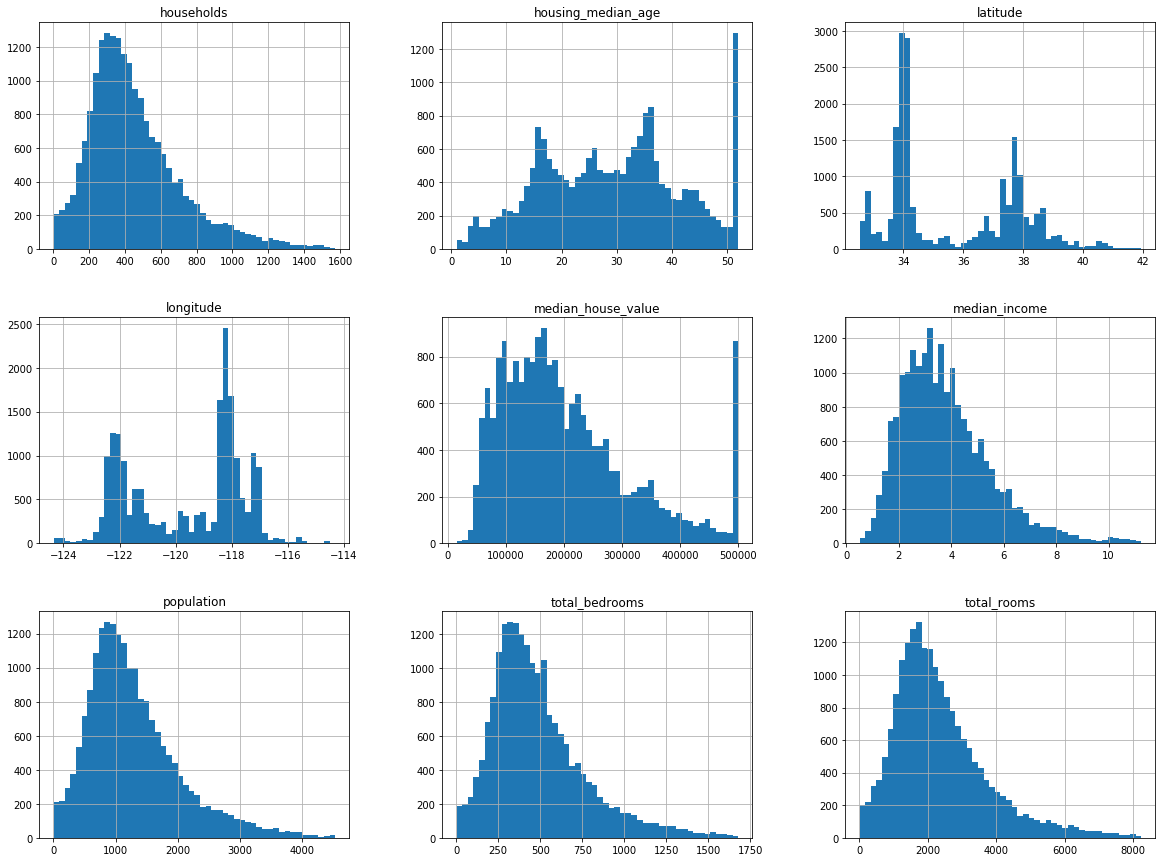

In [119]:
df_final.hist(bins=50, figsize=(20,15))
plt.savefig('Plots')
plt.show()


The number of houses are more if the ocean proximity is either near ocean, 
bay or island.

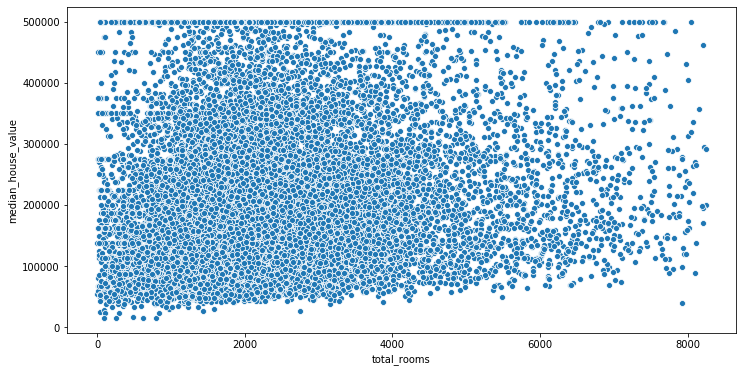

In [120]:
sns.scatterplot(df_final['total_rooms'],df_final['median_house_value'])

### There is no pattern observed. There is no increase in price of the block of houses as the total_rooms increase.

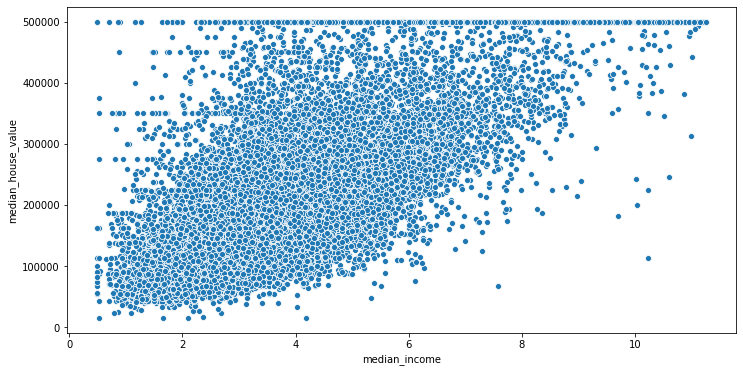

In [121]:
sns.scatterplot(df_final['median_income'], df_final['median_house_value'])

### There is moderate postive correlation between the median income and median house value.

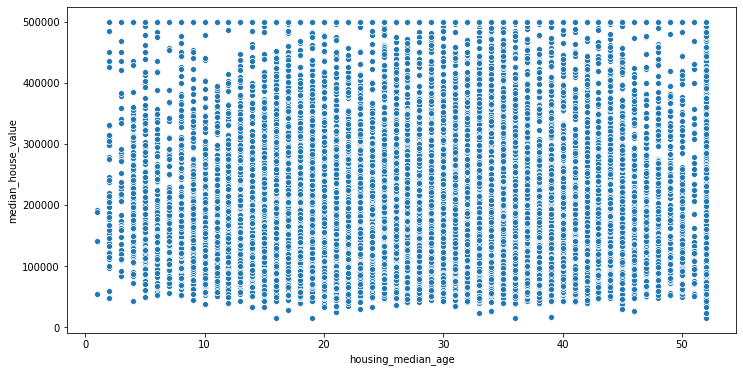

In [122]:
sns.scatterplot(df_final['housing_median_age'], df_final['median_house_value'])

### No pattern is observed between house median age and median house value

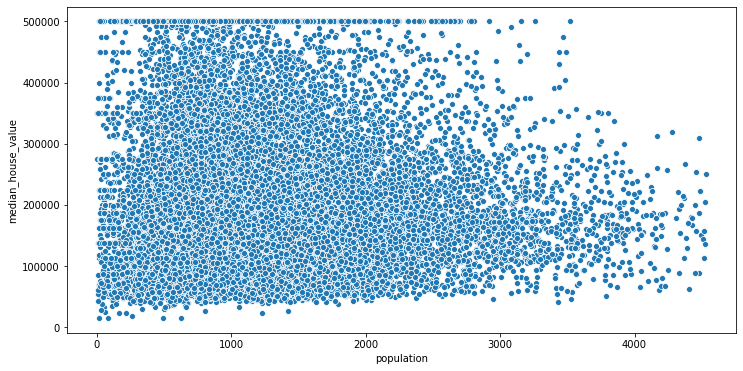

In [123]:
sns.scatterplot(df_final['population'], df_final['median_house_value'])

### There are 2 records with huge population. However the house value is **NOT** high as the population is huge.

# Correlation Matrix and Heatmap

In [124]:
corr = df_final.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924547,-0.099500,0.005385,0.042537,0.105024,0.032471,-0.015689,-0.045699
latitude,-0.924547,1.000000,0.002021,-0.007512,-0.052460,-0.127147,-0.064026,-0.082037,-0.145552
housing_median_age,-0.099500,0.002021,1.000000,-0.341109,-0.276096,-0.253392,-0.254119,-0.132970,0.110938
total_rooms,0.005385,-0.007512,-0.341109,1.000000,0.889351,0.791234,0.886291,0.250551,0.176074
total_bedrooms,0.042537,-0.052460,-0.276096,0.889351,1.000000,0.834251,0.966713,-0.039363,0.063133
population,0.105024,-0.127147,-0.253392,0.791234,0.834251,1.000000,0.877702,-0.024962,-0.044337
households,0.032471,-0.064026,-0.254119,0.886291,0.966713,0.877702,1.000000,-0.006531,0.083146
median_income,-0.015689,-0.082037,-0.132970,0.250551,-0.039363,-0.024962,-0.006531,1.000000,0.679445
median_house_value,-0.045699,-0.145552,0.110938,0.176074,0.063133,-0.044337,0.083146,0.679445,1.000000


Text(0.5, 1, 'Heatmap of the Correlation Matrix')

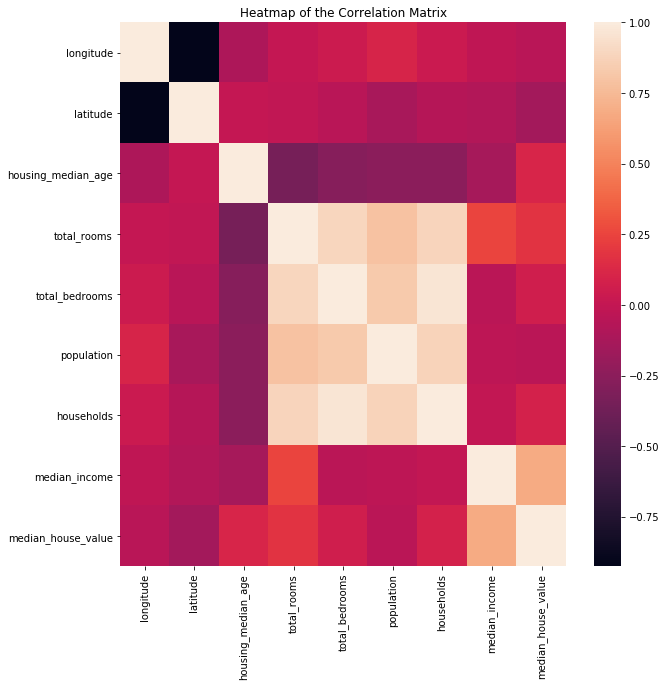

In [125]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.title('Heatmap of the Correlation Matrix')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86e09d3550>,
      dtype=object)

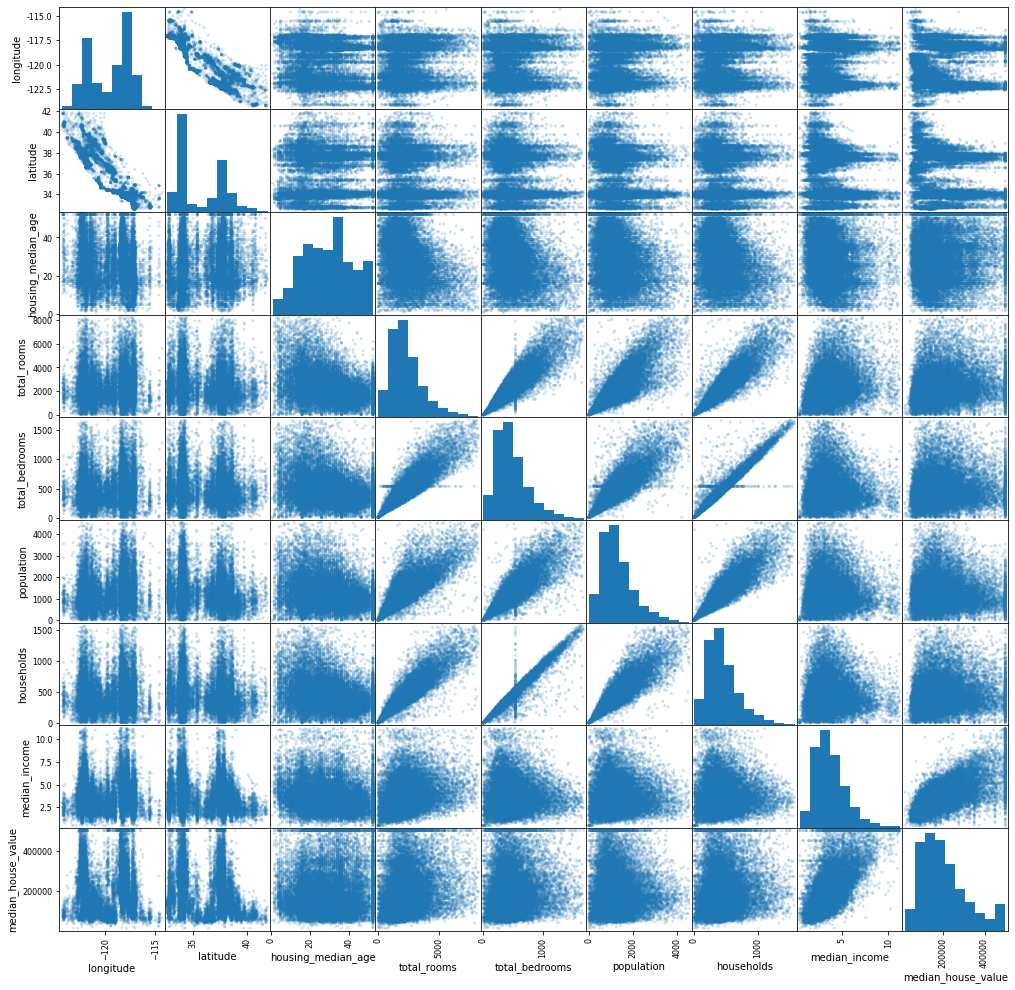

In [126]:
 scatter = pd.plotting.scatter_matrix(df_final, alpha=0.2, figsize=(17, 17), diagonal='hist')
 scatter

# **4. Feature Engineering**



4.a Create Dummy Varibles   
4.b Perform min/max normalization on the numeric columns




4.a Create Dummy Variables


In [127]:
df_final = pd.get_dummies(df_final, columns=["ocean_proximity"], drop_first=True)
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0


### 4.b Perform min/max normalization of the numeric columns

In [0]:
# import the MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [129]:
df_final.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [131]:
# For all the numeric columns, we should perform the minmax normalization to bring the values to the range 0 - 1
X = df_final.iloc[:, 2:8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
df_final.iloc[:,2:8] = rescaledX
df_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,0.784314,0.106528,0.075776,0.070451,0.078880,0.728179,452600.0,0,0,1,0
1,-122.22,37.86,0.392157,0.861077,0.658711,0.529594,0.722646,0.725964,358500.0,0,0,1,0
2,-122.24,37.85,1.000000,0.177748,0.112172,0.108878,0.111323,0.628815,352100.0,0,0,1,0
3,-122.25,37.85,1.000000,0.154331,0.139021,0.122571,0.138041,0.478597,341300.0,0,0,1,0
4,-122.25,37.85,1.000000,0.197161,0.165871,0.124117,0.163486,0.311388,342200.0,0,0,1,0


In [0]:
df_final.drop('longitude',axis=1,inplace=True)
df_final.drop('latitude',axis=1,inplace=True)

In [136]:
df_final.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.784314,0.106528,0.075776,0.070451,0.078880,0.728179,452600.0,0,0,1,0
1,0.392157,0.861077,0.658711,0.529594,0.722646,0.725964,358500.0,0,0,1,0
2,1.000000,0.177748,0.112172,0.108878,0.111323,0.628815,352100.0,0,0,1,0
3,1.000000,0.154331,0.139021,0.122571,0.138041,0.478597,341300.0,0,0,1,0
4,1.000000,0.197161,0.165871,0.124117,0.163486,0.311388,342200.0,0,0,1,0


# **5. Split the data to Train and Test (80, 20)**





In [0]:
from sklearn.model_selection import train_test_split

In [138]:
y = df_final['median_house_value']
X = df_final.drop(["median_house_value"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 123)
print(X_train.shape)
print(X_test.shape)

(15845, 10)
(3962, 10)


# 6. Linear Regression

In [0]:
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

In [0]:
# Fit Linear Regression
LR = LinearRegression()
LR_Model = LR.fit(X_train, y_train)
print(math.sqrt(mean_squared_error(y_test, LR_Model.predict(X_test))))
print(r2_score(y_train, LR_Model.predict(X_train)))
print(r2_score(y_test, LR_Model.predict(X_test)))

# 7. Decision Tree Model

In [139]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
dtree = tree.DecisionTreeRegressor(max_depth=10, min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
print(math.sqrt(mean_squared_error(y_test, dtree.predict(X_test))))
print(r2_score(y_train, dtree.predict(X_train)))
print(r2_score(y_test, dtree.predict(X_test)))



 ---Decision Tree Model---
70242.1646810371
0.6445287520643085
0.621632323069225


# 8. Random Forest Model

In [140]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=8,
                           min_samples_split=2,
                           n_estimators=300,
                           min_weight_fraction_leaf=0.00)
rf = rf.fit(X_train,y_train)
print ("\n\n ---Random Forest Tree ---")
print(math.sqrt(mean_squared_error(y_test, rf.predict(X_test))))
print(r2_score(y_train, rf.predict(X_train)))
print(r2_score(y_test, rf.predict(X_test)))



 ---Random Forest Tree ---
65941.31366758989
0.7254535596537612
0.6665479096317142


# Feature Importance

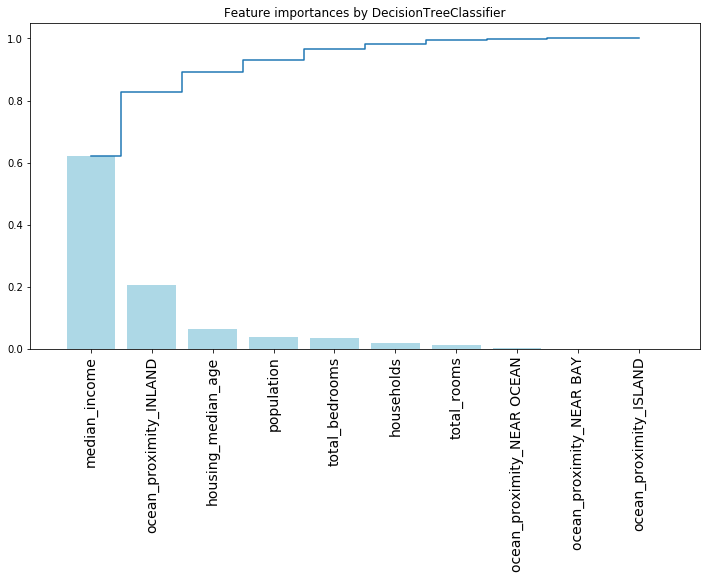

In [141]:
# Feature Importance
plt.rcParams['figure.figsize'] = (12,6)

## plot the importances ##
importances = rf.feature_importances_
feat_names = df_final.drop(['median_house_value'],axis=1).columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# **Dense Neural Network Architecture 1**

In [0]:
from keras import models
from keras import layers

In [0]:
# Three Layers with 64 nodes in each hidden layer
# The activation function in each hidden node is 'RELU'
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',
input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [0]:
# Compile the model
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [147]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=100, batch_size=10, 
          verbose=1) 

Train on 15845 samples, validate on 3962 samples
Epoch 1/100
15845/15845 [==============================] - 2s 150us/step - loss: 28161328883.3979 - mean_absolute_error: 129959.1029 - mean_squared_error: 28161328883.3979 - val_loss: 10441387052.3251 - val_mean_absolute_error: 80256.2191 - val_mean_squared_error: 10441387052.3251
Epoch 2/100
15845/15845 [==============================] - 2s 132us/step - loss: 8213854888.5932 - mean_absolute_error: 69211.0363 - mean_squared_error: 8213854888.5932 - val_loss: 6948558678.3241 - val_mean_absolute_error: 62094.0081 - val_mean_squared_error: 6948558678.3241
Epoch 3/100
15845/15845 [==============================] - 2s 129us/step - loss: 5924774933.4478 - mean_absolute_error: 57486.7429 - mean_squared_error: 5924774933.4478 - val_loss: 5598749380.0464 - val_mean_absolute_error: 55877.3334 - val_mean_squared_error: 5598749380.0464
Epoch 4/100
15845/15845 [==============================] - 2s 129us/step - loss: 5153045046.3061 - mean_absolute_er

In [148]:
history_dict = history.history
history_dict.keys() 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

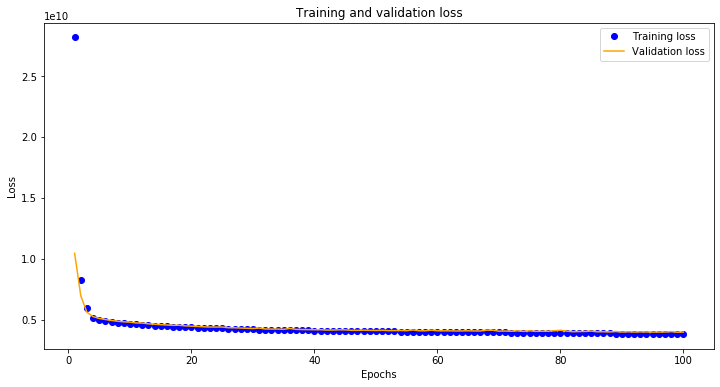

In [149]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

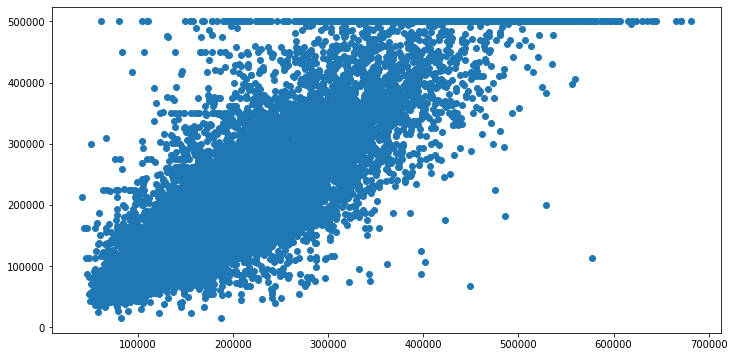

In [150]:
# Scatter plot for Training Data
myPreds_train = model.predict(X_train)
myActual_train = y_train
plt.scatter(myPreds_train, myActual_train)

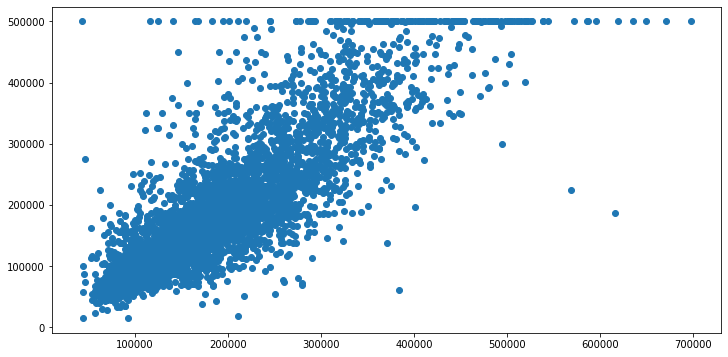

In [151]:
# Scatter plot for Test Data
myPreds_test = model.predict(X_test)
myActual_test = y_test
plt.scatter(myPreds_test, myActual_test)

In [154]:
resultDF = pd.DataFrame(history_dict)
resultDF.head()

,val_loss,val_mean_absolute_error,val_mean_squared_error,loss,mean_absolute_error,mean_squared_error
0,1.044139e+10,80256.219111,1.044139e+10,2.816133e+10,129959.102872,2.816133e+10
1,6.948559e+09,62094.008125,6.948559e+09,8.213855e+09,69211.036335,8.213855e+09
2,5.598749e+09,55877.333395,5.598749e+09,5.924775e+09,57486.742864,5.924775e+09
3,5.241577e+09,52915.324978,5.241577e+09,5.153045e+09,52935.575889,5.153045e+09
4,5.087895e+09,52279.576689,5.087895e+09,4.956652e+09,51399.857441,4.956652e+09


In [152]:
# RMSE
import math
print(mean_squared_error(y_test, myPreds_test))
print(np.sqrt(mean_squared_error(y_test, myPreds_test)))

3971409265.7727633
63019.11825607181


In [153]:
results = model.evaluate(X_test, y_test)
results

3962/3962 [==============================] - 0s 20us/step


[3971409312.8238263, 44441.950741024106, 3971409312.8238263]

# **Dense Neural Network Architecture 2**

In [0]:
# Different Dropout values
from keras.models import Sequential
from keras.layers import Dense, Dropout

model2 = models.Sequential()
model2.add(layers.Dense(32, activation='relu',
input_shape=(X_train.shape[1],)))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1))

In [0]:
# Compile the model
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [157]:
history = model2.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=50, batch_size=10, 
          verbose=1) 

Train on 15845 samples, validate on 3962 samples
Epoch 1/50
15845/15845 [==============================] - 2s 158us/step - loss: 53995927392.3736 - mean_absolute_error: 202881.0625 - mean_squared_error: 53995927392.3736 - val_loss: 52186431889.1227 - val_mean_absolute_error: 197908.8517 - val_mean_squared_error: 52186431889.1227
Epoch 2/50
15845/15845 [==============================] - 2s 139us/step - loss: 46478657130.7946 - mean_absolute_error: 183213.9624 - mean_squared_error: 46478657130.7946 - val_loss: 38394812624.0565 - val_mean_absolute_error: 159617.8956 - val_mean_squared_error: 38394812624.0565
Epoch 3/50
15845/15845 [==============================] - 2s 137us/step - loss: 28149917231.7425 - mean_absolute_error: 128874.5828 - mean_squared_error: 28149917231.7425 - val_loss: 17894133791.7577 - val_mean_absolute_error: 97583.5020 - val_mean_squared_error: 17894133791.7577
Epoch 4/50
15845/15845 [==============================] - 2s 145us/step - loss: 16296845143.9722 - mean_ab

In [158]:
history_dict = history.history
history_dict.keys() 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

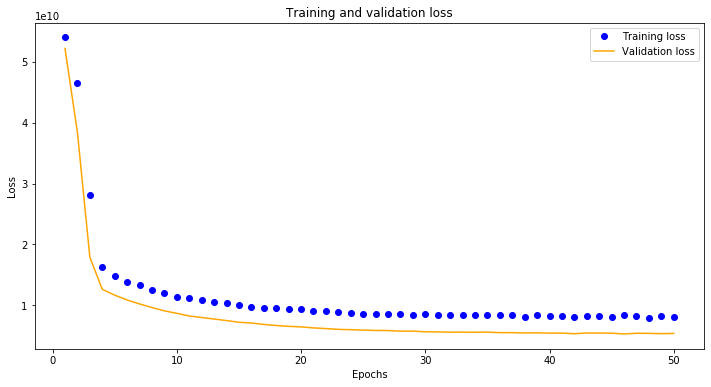

In [159]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

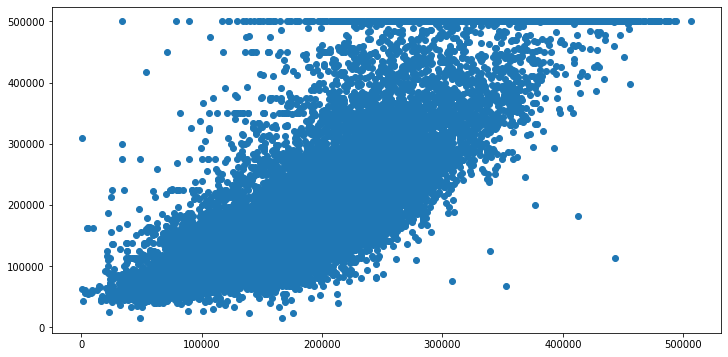

In [160]:
# Scatter plot for Training Data
myPreds_train = model2.predict(X_train)
myActual_train = y_train
plt.scatter(myPreds_train, myActual_train)

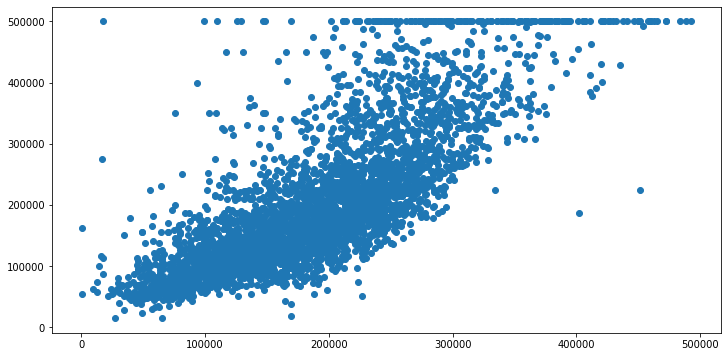

In [161]:
# Scatter plot for Test Data
myPreds_test = model2.predict(X_test)
myActual_test = y_test
plt.scatter(myPreds_test, myActual_test)

In [162]:
# RMSE
import math
print(mean_squared_error(y_test, myPreds_test))
print(np.sqrt(mean_squared_error(y_test, myPreds_test)))

5383070373.437807
73369.41033862687


In [163]:
results = model2.evaluate(X_test, y_test)
results

3962/3962 [==============================] - 0s 20us/step


[5383070388.660273, 51387.62440449899, 5383070388.660273]

In [164]:
resultDF = pd.DataFrame(history_dict)
print(resultDF.shape)
print(resultDF.head())

(50, 6)
       val_loss  ...  mean_squared_error
0  5.218643e+10  ...        5.399593e+10
1  3.839481e+10  ...        4.647866e+10
2  1.789413e+10  ...        2.814992e+10
3  1.263938e+10  ...        1.629685e+10
4  1.166561e+10  ...        1.475572e+10

[5 rows x 6 columns]


# **Dense Neural Network Architecture 3**




In [0]:
# Different sizes of layers 
model3 = models.Sequential()
model3.add(layers.Dense(128, activation='relu',input_shape=(X_train.shape[1],)))
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(32, activation='relu'))
model3.add(layers.Dense(1))

In [0]:
# Compile the model
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [168]:
history = model3.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=50, batch_size=10, 
          verbose=1) 

Train on 15845 samples, validate on 3962 samples
Epoch 1/50
15845/15845 [==============================] - 3s 165us/step - loss: 19105755207.2098 - mean_absolute_error: 102473.3735 - mean_squared_error: 19105755207.2098 - val_loss: 7203236726.7602 - val_mean_absolute_error: 64424.5164 - val_mean_squared_error: 7203236726.7602
Epoch 2/50
15845/15845 [==============================] - 2s 135us/step - loss: 5759446379.3601 - mean_absolute_error: 56505.4559 - mean_squared_error: 5759446379.3601 - val_loss: 5316082358.7118 - val_mean_absolute_error: 53150.9928 - val_mean_squared_error: 5316082358.7118
Epoch 3/50
15845/15845 [==============================] - 2s 142us/step - loss: 4954917388.3799 - mean_absolute_error: 51405.9445 - mean_squared_error: 4954917388.3799 - val_loss: 5096750480.8319 - val_mean_absolute_error: 51131.9000 - val_mean_squared_error: 5096750480.8319
Epoch 4/50
15845/15845 [==============================] - 2s 139us/step - loss: 4796946356.5895 - mean_absolute_error: 5

In [169]:
history_dict = history.history
history_dict.keys() 

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'loss', 'mean_absolute_error', 'mean_squared_error'])

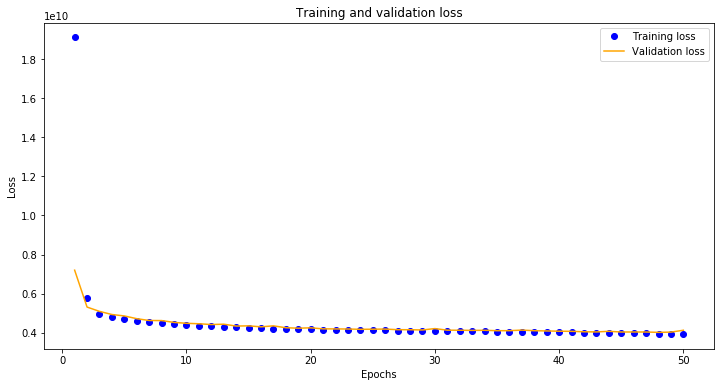

In [170]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

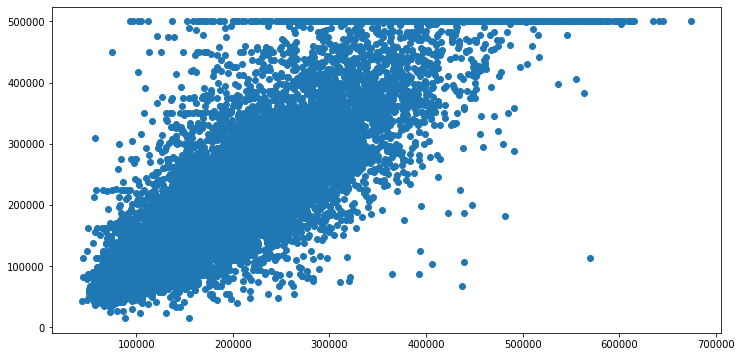

In [171]:
# Scatter plot for Training Data
myPreds_train = model3.predict(X_train)
myActual_train = y_train
plt.scatter(myPreds_train, myActual_train)

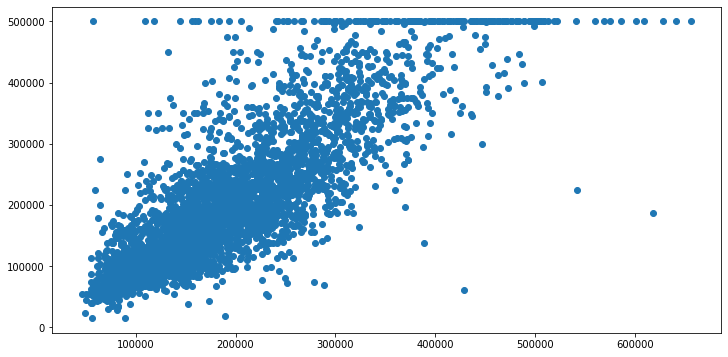

In [172]:
# Scatter plot for Test Data
myPreds_test = model3.predict(X_test)
myActual_test = y_test
plt.scatter(myPreds_test, myActual_test)

In [173]:
# RMSE
import math
print(mean_squared_error(y_test, myPreds_test))
print(np.sqrt(mean_squared_error(y_test, myPreds_test)))

4130206693.321399
64266.68416311362


In [174]:
results = model3.evaluate(X_test, y_test)
results

3962/3962 [==============================] - 0s 22us/step


[4130206714.5724382, 44260.7797789942, 4130206714.5724382]

In [175]:
resultDF = pd.DataFrame(history_dict)
print(resultDF.shape)
print(resultDF.head())

(50, 6)
       val_loss  ...  mean_squared_error
0  7.203237e+09  ...        1.910576e+10
1  5.316082e+09  ...        5.759446e+09
2  5.096750e+09  ...        4.954917e+09
3  4.936405e+09  ...        4.796946e+09
4  4.862920e+09  ...        4.688777e+09

[5 rows x 6 columns]
